In [2]:
#Import basic packages
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
#Output plots in notebook
%matplotlib inline 

data = pd.read_csv("HR_comma_sep.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
data['sales'].unique(),data['salary'].unique()

(array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
        'IT', 'product_mng', 'marketing', 'RandD'], dtype=object),
 array(['low', 'medium', 'high'], dtype=object))

In [7]:
data['sales'].replace(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
        'IT', 'product_mng', 'marketing', 'RandD'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], inplace = True)
data['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace = True)

In [11]:
data['avg_hour_project'] = (data['average_montly_hours'] * 12) /data['number_project']
data['avg_hour_project_range'] = pd.cut(data['avg_hour_project'], 3)
data[['avg_hour_project_range', 'left']].groupby(['avg_hour_project_range']).mean()

,left
avg_hour_project_range,
"(192.334, 749.333]",0.186359
"(749.333, 1304.667]",0.340725
"(1304.667, 1860]",0.098940


In [12]:
data.loc[data['avg_hour_project'] <= 749.333, 'avg_hour_project'] = 0
data.loc[(data['avg_hour_project'] > 749.333) & (data['avg_hour_project'] <= 1304.667), 'avg_hour_project'] = 1
data.loc[(data['avg_hour_project'] > 1304.667) & (data['avg_hour_project'] <= 1860.00), 'avg_hour_project'] = 2
data.drop(['avg_hour_project_range'], axis = 1, inplace = True)

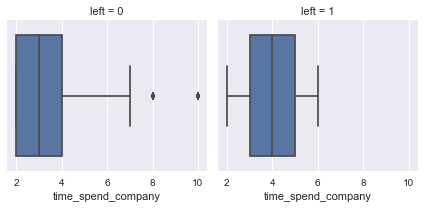

In [13]:
#time_spend_company
#Boxplot
#To briefly see the data distribution and if there're outliers
g = sns.FacetGrid(data, col = 'left')
g.map(sns.boxplot, 'time_spend_company')

In [14]:
#Outliers do exist, simply drop those observations
dropdata = data[data['time_spend_company'] >= 8]
data.drop(dropdata.index, inplace = True)

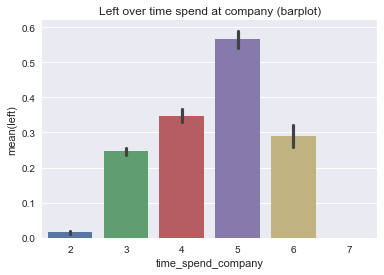

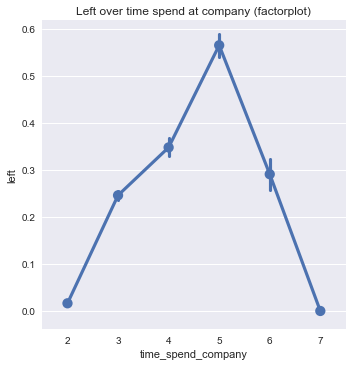

In [15]:
sns.barplot(x = 'time_spend_company', y = 'left', data = data)
sns.plt.title('Left over time spend at company (barplot)')
sns.factorplot(x= 'time_spend_company', y = 'left', data = data, size = 5)
sns.plt.title('Left over time spend at company (factorplot)')

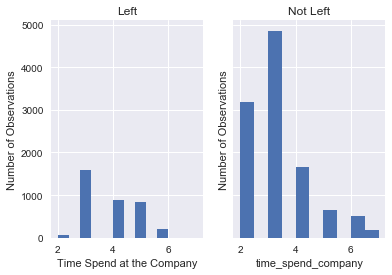

In [16]:
left = data[data['left'] == 1]
not_left = data[data['left'] == 0]
f, axrrr = plt.subplots(1, 2, sharey=True, sharex = True)

axrrr[0].hist('time_spend_company', data = left, bins = 10)
axrrr[0].set_title('Left')
axrrr[0].set_xlabel('Time Spend at the Company')
axrrr[0].set_ylabel('Number of Observations')
axrrr[1].hist('time_spend_company', data = not_left, bins = 10)
axrrr[1].set_title('Not Left')
axrrr[1].set_xlabel('time_spend_company')
axrrr[1].set_ylabel('Number of Observations')

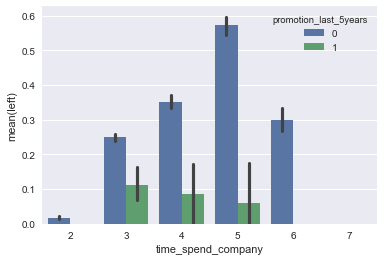

In [17]:
sns.barplot(x='time_spend_company', y = 'left', hue = 'promotion_last_5years', data = data)

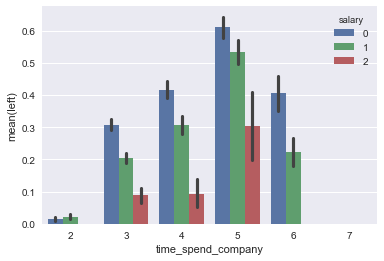

In [18]:
sns.barplot(x='time_spend_company', y ='left', hue='salary', data= data)

In [19]:
g=sns.FacetGrid(data, col='left')
g.map(sns.boxplot,'average_montly_hours')
np.mean(data[data['left']==1])

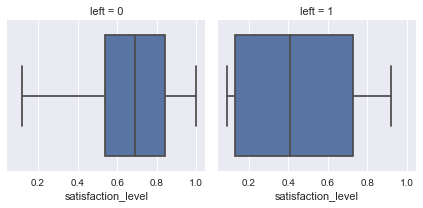

In [21]:
#Boxplot
g = sns.FacetGrid(data, col = 'left')
g.map(sns.boxplot, 'satisfaction_level')

In [22]:
#Continuous to categorical
data['satisfaction_range'] = pd.cut(data['satisfaction_level'], 3)
data[['satisfaction_range', 'left']].groupby(['satisfaction_range']).mean()

,left
satisfaction_range,
"(0.0891, 0.393]",0.545455
"(0.393, 0.697]",0.196339
"(0.697, 1]",0.148668


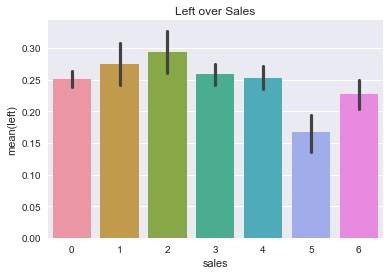

In [24]:
sns.barplot('sales','left',order=[0, 1, 2, 3, 4, 5, 6], data=data)
sns.plt.title('Left over Sales')